# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=15)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=15)
lat_lngs = zip(lats, lngs)

In [3]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

14

In [4]:
cities[0]

'saint-philippe'

In [5]:
url='http://api.openweathermap.org/data/2.5/weather?q='
key='&appid='+weather_api_key
print(url+cities[0]+'&units=imperial'+key)

response=requests.get(url+cities[0]+'&units=imperial'+key).json()
response

http://api.openweathermap.org/data/2.5/weather?q=saint-philippe&units=imperial&appid=45624033992d2134ceb2e8036a837cc8


{'coord': {'lon': 55.77, 'lat': -21.36},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 59.9,
  'feels_like': 44.94,
  'temp_min': 53.01,
  'temp_max': 68,
  'pressure': 1022,
  'humidity': 56},
 'visibility': 10000,
 'wind': {'speed': 24.16, 'deg': 120},
 'clouds': {'all': 75},
 'dt': 1595523865,
 'sys': {'type': 1,
  'id': 2127,
  'country': 'RE',
  'sunrise': 1595472730,
  'sunset': 1595512459},
 'timezone': 14400,
 'id': 935215,
 'name': 'Saint-Philippe',
 'cod': 200}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
city=[]
lat=[]           
lng=[]           
maxtemp=[]      
humidity=[]      
cloudiness=[]    
windspeed=[]    
country=[]       
date=[]
url='http://api.openweathermap.org/data/2.5/weather?q='
key='&appid='+weather_api_key
for index, location in enumerate(cities):
    try:
        weather=requests.get(url+location+'&units=imperial'+key).json()
        country.append(weather['sys']['country']) #country
        lng.append(weather['coord']['lon']) #longitude
        lat.append(weather['coord']['lat']) #latitude
        maxtemp.append(weather['main']['temp_max']) #max teperature
        humidity.append(weather['main']['humidity']) #humidity
        cloudiness.append(weather['clouds']['all']) #cloudiness
        windspeed.append(weather['wind']['speed']) #wind speed
        date.append(weather['dt']) #date
        print(f"Processing city number {index+1}:{location}.")
        if location not in city:
            city.append(location)
    except KeyError:
        print(f"Processing city number {index+1}:{location}. NO DATA FOUND")
        

Processing city number 1:rungata. NO DATA FOUND
Processing city number 2:rikitea.
Processing city number 3:tumannyy. NO DATA FOUND
Processing city number 4:flin flon.
Processing city number 5:bayanday.
Processing city number 6:petropavlovsk-kamchatskiy.
Processing city number 7:norman wells.
Processing city number 8:ushuaia.
Processing city number 9:faanui.
Processing city number 10:rocha.
Processing city number 11:carnarvon.
Processing city number 12:mar del plata.
Processing city number 13:new norfolk.
Processing city number 14:fairbanks.


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_df=pd.DataFrame({'City':city,
                         "Country":country,
                         "Latitude":lat,
                         "Longitude":lng,
                         "Max Temp":maxtemp,
                         "Humidity":humidity,
                         "Cloudiness":cloudiness,
                         "Wind Speed": windspeed,
                         "Date":date
                        })
weather_df.head(5)


,City,Country,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,rikitea,PF,-23.12,-134.97,72.21,75,84,17.45,1595963643
1,flin flon,CA,54.77,-101.86,71.60,53,5,4.70,1595963643
2,bayanday,RU,53.07,105.51,54.75,90,100,3.65,1595963643
3,petropavlovsk-kamchatskiy,RU,53.05,158.65,57.20,100,91,6.71,1595963644
4,norman wells,CA,65.28,-126.83,62.60,77,75,9.17,1595962773


## Inspect the data and remove the cities where the humidity > 100%.

In [8]:
cleaned_weather_df=weather_df[weather_df['Humidity']<=100]
cleaned_weather_df.reset_index(inplace=True)
cleaned_weather_df.drop(axis=1,labels="index", inplace=True)

In [9]:
# Export the City_Data into a csv
weather_df.to_csv("../output_data/cities.csv")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [10]:
#Data to be plotted
city=cleaned_weather_df['City']
lat=cleaned_weather_df['Latitude']           
lng=cleaned_weather_df['Longitude']           
maxtemp=cleaned_weather_df["Max Temp"]      
humidity=cleaned_weather_df['Humidity']      
cloudiness=cleaned_weather_df['Cloudiness']    
windspeed=cleaned_weather_df['Wind Speed']    
country=cleaned_weather_df['Country']       
date=input('Enter the date for the corresponding data in MM/DD/YY')

Enter the date for the corresponding data in MM/DD/YY 07/23/20


### Latitude vs. Temperature Plot

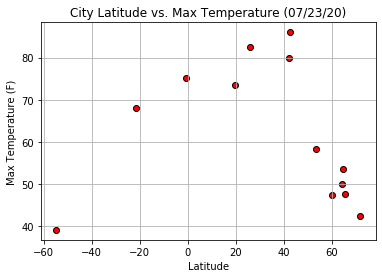

In [11]:
plt.scatter(x=lat, y=maxtemp, c='red', linewidths=1, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs. Max Temperature ({date})')
plt.grid()
plt.show()

### Latitude vs. Humidity Plot

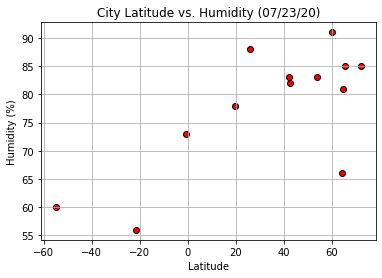

In [12]:
plt.scatter(x=lat, y=humidity, c='red', linewidths=1, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity ({date})')
plt.grid()
plt.show()

### Latitude vs. Cloudiness Plot

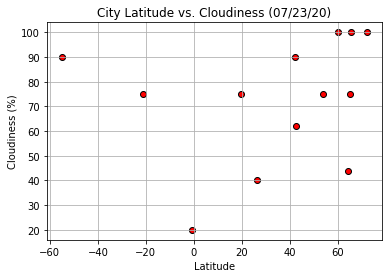

In [13]:
plt.scatter(x=lat, y=cloudiness, c='red', linewidths=1, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness ({date})')
plt.grid()
plt.show()

### Latitude vs. Wind Speed Plot

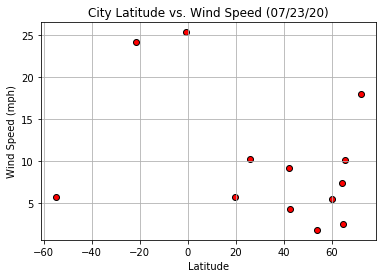

In [14]:
plt.scatter(x=lat, y=windspeed, c='red', linewidths=1, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs. Wind Speed ({date})')
plt.grid()
plt.show()

# Linear Regression

In [15]:
# OPTIONAL: Create a function to create Linear Regression plots
# Create Northern and Southern Hemisphere DataFrames

south_cleaned_weather_df=cleaned_weather_df[cleaned_weather_df['Latitude']<0]
north_cleaned_weather_df=cleaned_weather_df[cleaned_weather_df['Latitude']>=0]

In [16]:
# Northern Data to be plotted

In [17]:
ncity=north_cleaned_weather_df['City']
nlat=north_cleaned_weather_df['Latitude']           
nlng=north_cleaned_weather_df['Longitude']           
nmaxtemp=north_cleaned_weather_df["Max Temp"]      
nhumidity=north_cleaned_weather_df['Humidity']      
ncloudiness=north_cleaned_weather_df['Cloudiness']    
nwindspeed=north_cleaned_weather_df['Wind Speed']    
ncountry=north_cleaned_weather_df['Country']

In [18]:
# Southern Data to be plotted

In [19]:
scity=south_cleaned_weather_df['City']
slat=south_cleaned_weather_df['Latitude']           
slng=south_cleaned_weather_df['Longitude']           
smaxtemp=south_cleaned_weather_df["Max Temp"]      
shumidity=south_cleaned_weather_df['Humidity']      
scloudiness=south_cleaned_weather_df['Cloudiness']    
swindspeed=south_cleaned_weather_df['Wind Speed']    
scountry=south_cleaned_weather_df['Country']

### Northern Hemisphere - Wind Speed (mph) vs. Latitude

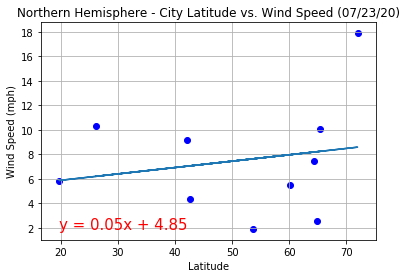

The r-squared value is : 0.038764279022907695


In [28]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(nlat,nwindspeed)
regress_values = nlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(nlat,regress_values)
plt.scatter(x=nlat, y=nwindspeed, c='blue')
plt.annotate(line_eq,xy=(nlat.min(),nwindspeed.min()),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Northern Hemisphere - City Latitude vs. Wind Speed ({date})')
plt.grid()
plt.show()
print(f"The r-squared value is : {rvalue**2}")

### Southern Hemisphere - Wind Speed (mph) vs. Latitude

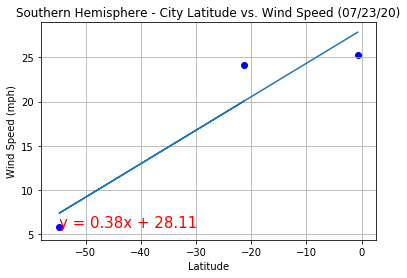

The r-squared value is : 0.8911304721931392


In [27]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(slat,swindspeed)
regress_values = slat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(slat,regress_values)
plt.scatter(x=slat, y=swindspeed, c='blue')
plt.annotate(line_eq,xy=(slat.min(),swindspeed.min()),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Southern Hemisphere - City Latitude vs. Wind Speed ({date})')
plt.grid()
plt.show()
print(f"The r-squared value is : {rvalue**2}")

### Northern Hemisphere - Temperature (F) vs. Latitude

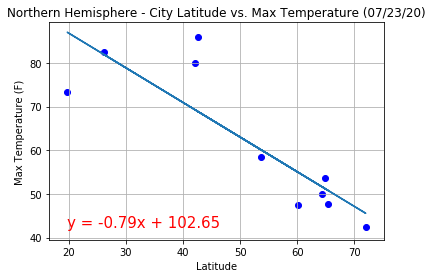

The r-squared value is : 0.7248028385197633


In [26]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(nlat,nmaxtemp)
regress_values = nlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(nlat,regress_values)
plt.scatter(x=nlat, y=nmaxtemp, c='blue')
plt.annotate(line_eq,xy=(nlat.min(),nmaxtemp.min()),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'Northern Hemisphere - City Latitude vs. Max Temperature ({date})')
plt.grid()
plt.show()
print(f"The r-squared value is : {rvalue**2}")

### Southern Hemisphere - Temperature (F) vs. Latitude

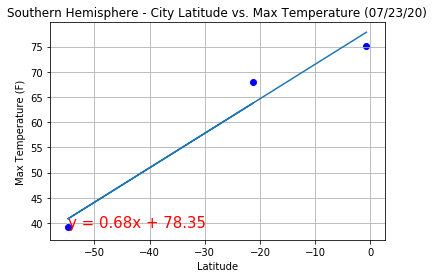

The r-squared value is : 0.9615351770657659


In [31]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(slat,smaxtemp)
regress_values = slat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(slat,regress_values)
plt.scatter(x=slat, y=smaxtemp, c='blue')
plt.annotate(line_eq,xy=(slat.min(),smaxtemp.min()),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'Southern Hemisphere - City Latitude vs. Max Temperature ({date})')
plt.grid()
plt.show()
print(f"The r-squared value is : {rvalue**2}")

### Northern Hemisphere - Humidity (%) vs. Latitude

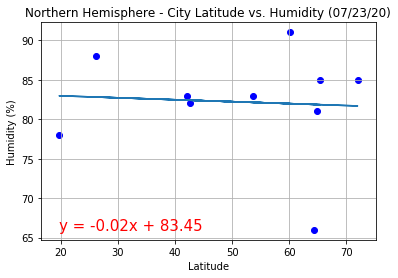

The r-squared value is : 0.004204229296705911


In [30]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(nlat,nhumidity)
regress_values = nlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(nlat,regress_values)
plt.scatter(x=nlat, y=nhumidity, c='blue')
plt.annotate(line_eq,xy=(nlat.min(),nhumidity.min()),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Northern Hemisphere - City Latitude vs. Humidity ({date})')
plt.grid()
plt.show()
print(f"The r-squared value is : {rvalue**2}")

### Southern Hemisphere - Humidity (%) vs. Latitude

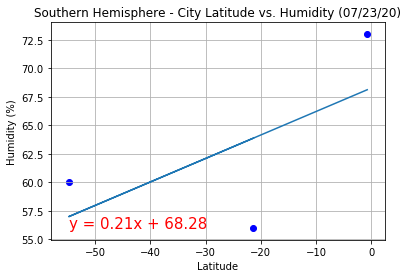

The r-squared value is : 0.3994594059125709


In [32]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(slat,shumidity)
regress_values = slat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(slat,regress_values)
plt.scatter(x=slat, y=shumidity, c='blue')
plt.annotate(line_eq,xy=(slat.min(),shumidity.min()),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Southern Hemisphere - City Latitude vs. Humidity ({date})')
plt.grid()
plt.show()
print(f"The r-squared value is : {rvalue**2}")

### Northern Hemisphere - Cloudiness (%) vs. Latitude

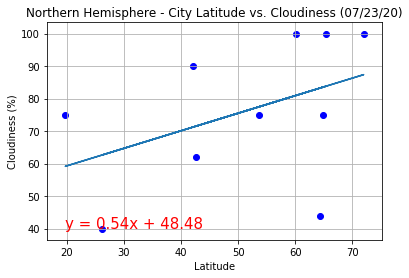

The r-squared value is : 0.18784238012700286


In [29]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(nlat,ncloudiness)
regress_values = nlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(nlat,regress_values)
plt.scatter(x=nlat, y=ncloudiness, c='blue')
plt.annotate(line_eq,xy=(nlat.min(),ncloudiness.min()),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'Northern Hemisphere - City Latitude vs. Cloudiness ({date})')
plt.grid()
plt.show()
print(f"The r-squared value is : {rvalue**2}")

### Southern Hemisphere - Cloudiness (%) vs. Latitude

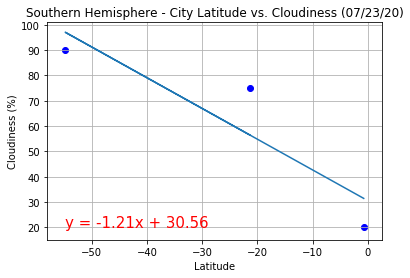

The r-squared value is : 0.8070785197687153


In [33]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(slat,scloudiness)
regress_values = slat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(slat,regress_values)
plt.scatter(x=slat, y=scloudiness, c='blue')
plt.annotate(line_eq,xy=(slat.min(),scloudiness.min()),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'Southern Hemisphere - City Latitude vs. Cloudiness ({date})')
plt.grid()
plt.show()
print(f"The r-squared value is : {rvalue**2}")